In [109]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv('cancelamentos.csv')
df

,emissoes_ultimos_3_meses,emissoes_ultimo_mes,crescimento_emissoes,tickets_abertos_ultimos_3_meses,tickets_abertos_ultimo_mes,crescimento_tickets_abertos,atraso_fatura_ultimos_3_meses,atraso_fatura_ultimo_mes,mes,cancelamento
0,3237,600,0.56,47,21,1.31,2,1,6,1
1,3038,1039,1.03,9,3,1.00,1,0,6,0
2,9451,3186,1.01,12,4,1.00,1,0,7,0
3,1097,207,0.57,36,15,1.25,2,1,7,1
4,3754,1268,1.01,2,0,0.00,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...
9995,1780,618,1.04,7,1,0.33,0,0,2,0
9996,6455,2176,1.01,2,0,0.00,2,1,11,1
9997,2616,897,1.03,2,0,0.00,2,0,7,0
9998,5288,1791,1.02,15,4,0.80,2,1,4,0


In [110]:
df['cancelamento'].unique()

array([1, 0])

In [111]:
total = df.shape[0]
cancelamentos = df['cancelamento'].sum()
print('Proporção de cancelamentos: {}/{} = {:.2f}%'.format(cancelamentos, total, (cancelamentos * 100) / total))

Proporção de cancelamentos: 3486/10000 = 34.86%


In [112]:
def new_model(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rfc = RandomForestClassifier(n_estimators=100)
    model = rfc.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return {
        'model': model,
        'confusion_matrix': metrics.confusion_matrix(y_test, predictions),
        'accuracy': metrics.accuracy_score(y_test, predictions),
    }

In [113]:
# removendo o mês temporariamente

features = ['emissoes_ultimos_3_meses', 'emissoes_ultimo_mes', 'crescimento_emissoes', 'tickets_abertos_ultimos_3_meses', 'tickets_abertos_ultimo_mes', 'crescimento_tickets_abertos', 'atraso_fatura_ultimos_3_meses', 'atraso_fatura_ultimo_mes']
features

['emissoes_ultimos_3_meses',
 'emissoes_ultimo_mes',
 'crescimento_emissoes',
 'tickets_abertos_ultimos_3_meses',
 'tickets_abertos_ultimo_mes',
 'crescimento_tickets_abertos',
 'atraso_fatura_ultimos_3_meses',
 'atraso_fatura_ultimo_mes']

In [114]:
new_model(df, features, 'cancelamento')['confusion_matrix']

array([[1671,  261],
       [ 429,  639]])

In [2]:
# Acurácia: dentre todas as predições, quantos acertos - TN + TP / TP + FP + TN + FN
# Precisão: dentre os cancelamentos previstos, quantos acertos - TP / TP + FP
# Revocação/Recall: dentre os cancelamentos reais, quantos foram previstos - TP / TP + FN
# MCC: varia de -1 até 1, 1 significa predições perfeitas, 0 aparenta ser aleatório, -1 completamente divergente

# TP: previsões positivas corretas
# TN: previsões negativas corretas
# FP: previsões positivas erradas
# FN: previsões negativas erradas

In [3]:
# exemplo
# em um total de 100 registros, somente existem 10 cancelamentos
# como seriam as métricas de um modelo que não previu nenhum cancelamento

TP = 0
TN = 90
FP = 10
FN = 0

print('Acurácia:', (TN + TP) / (TP + FP + TN + FN))
print('Precisão:', TP / (TP + FP))
print('Recall:', TP / (TP + FN))

Acurácia: 0.9
Precisão: 0.0


ZeroDivisionError: division by zero

In [4]:
# exemplo
# em um total de 100 registros, somente existem 10 cancelamentos
# como seriam as métricas de um modelo que previu 5 cancelamentos e errou 10 "não cancelamentos"

TP = 5
TN = 80
FP = 10
FN = 5

print('Acurácia:', (TN + TP) / (TP + FP + TN + FN))
print('Precisão:', TP / (TP + FP))
print('Recall:', TP / (TP + FN))

Acurácia: 0.85
Precisão: 0.3333333333333333
Recall: 0.5


In [118]:
def new_model(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rfc = RandomForestClassifier(n_estimators=100)
    model = rfc.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return {
        'model': model,
        'confusion_matrix': metrics.confusion_matrix(y_test, predictions),
        'metrics': {
            'accuracy': metrics.accuracy_score(y_test, predictions),
            'precision': metrics.precision_score(y_test, predictions),
            'recall': metrics.recall_score(y_test, predictions),
            'mcc': metrics.matthews_corrcoef(y_test, predictions),
        }
    }

In [119]:
new_model(df, features, 'cancelamento')['metrics']

{'accuracy': 0.7776666666666666,
 'precision': 0.7020089285714286,
 'recall': 0.6112730806608357,
 'mcc': 0.49352214171644143}

In [120]:
for i in range(5):
    print(new_model(df, features, 'cancelamento')['metrics'])

{'accuracy': 0.7713333333333333, 'precision': 0.695303550973654, 'recall': 0.5910418695228822, 'mcc': 0.4765779336510024}
{'accuracy': 0.7733333333333333, 'precision': 0.7113636363636363, 'recall': 0.5950570342205324, 'mcc': 0.4870065562436871}
{'accuracy': 0.7726666666666666, 'precision': 0.7179763186221744, 'recall': 0.6136154553817847, 'mcc': 0.49554266520807067}
{'accuracy': 0.7626666666666667, 'precision': 0.709211986681465, 'recall': 0.5867768595041323, 'mcc': 0.4717101786337477}
{'accuracy': 0.7603333333333333, 'precision': 0.6840958605664488, 'recall': 0.5941343424787133, 'mcc': 0.461164288784069}


No handles with labels found to put in legend.


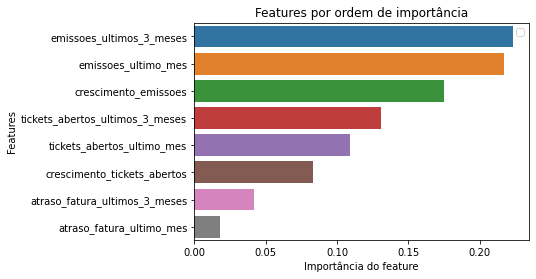

In [121]:
model = new_model(df, features, 'cancelamento')

feature_importance = pd.Series(model['model'].feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Features por ordem de importância')
plt.xlabel('Importância do feature')
plt.ylabel('Features')
plt.legend()
plt.show()

In [122]:
# como lidar com o mês

features = ['emissoes_ultimos_3_meses', 'emissoes_ultimo_mes', 'crescimento_emissoes', 'tickets_abertos_ultimos_3_meses', 'tickets_abertos_ultimo_mes', 'crescimento_tickets_abertos', 'atraso_fatura_ultimos_3_meses', 'atraso_fatura_ultimo_mes', 'mes']
features

['emissoes_ultimos_3_meses',
 'emissoes_ultimo_mes',
 'crescimento_emissoes',
 'tickets_abertos_ultimos_3_meses',
 'tickets_abertos_ultimo_mes',
 'crescimento_tickets_abertos',
 'atraso_fatura_ultimos_3_meses',
 'atraso_fatura_ultimo_mes',
 'mes']

In [123]:
df = pd.get_dummies(df, prefix_sep='_', columns=['mes'])
df

,emissoes_ultimos_3_meses,emissoes_ultimo_mes,crescimento_emissoes,tickets_abertos_ultimos_3_meses,tickets_abertos_ultimo_mes,crescimento_tickets_abertos,atraso_fatura_ultimos_3_meses,atraso_fatura_ultimo_mes,cancelamento,mes_1,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,3237,600,0.56,47,21,1.31,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,3038,1039,1.03,9,3,1.00,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9451,3186,1.01,12,4,1.00,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1097,207,0.57,36,15,1.25,2,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,3754,1268,1.01,2,0,0.00,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1780,618,1.04,7,1,0.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,6455,2176,1.01,2,0,0.00,2,1,1,0,...,0,0,0,0,0,0,0,0,1,0
9997,2616,897,1.03,2,0,0.00,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9998,5288,1791,1.02,15,4,0.80,2,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [124]:
features = ['emissoes_ultimos_3_meses', 'emissoes_ultimo_mes', 'crescimento_emissoes', 'tickets_abertos_ultimos_3_meses', 'tickets_abertos_ultimo_mes', 'crescimento_tickets_abertos', 'atraso_fatura_ultimos_3_meses', 'atraso_fatura_ultimo_mes', 'mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12']
features

['emissoes_ultimos_3_meses',
 'emissoes_ultimo_mes',
 'crescimento_emissoes',
 'tickets_abertos_ultimos_3_meses',
 'tickets_abertos_ultimo_mes',
 'crescimento_tickets_abertos',
 'atraso_fatura_ultimos_3_meses',
 'atraso_fatura_ultimo_mes',
 'mes_1',
 'mes_2',
 'mes_3',
 'mes_4',
 'mes_5',
 'mes_6',
 'mes_7',
 'mes_8',
 'mes_9',
 'mes_10',
 'mes_11',
 'mes_12']

No handles with labels found to put in legend.


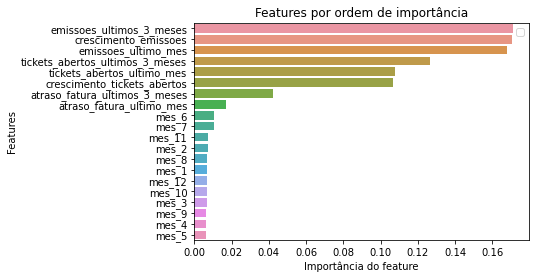

In [125]:
model = new_model(df, features, 'cancelamento')

feature_importance = pd.Series(model['model'].feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Features por ordem de importância')
plt.xlabel('Importância do feature')
plt.ylabel('Features')
plt.legend()
plt.show()

In [126]:
proporcao_cancelamentos_mes = []

for mes in range(1, 13):
    registros = df[df['mes_{}'.format(mes)] == 1]
    total_registros = registros.shape[0]
    total_cancelamentos = registros['cancelamento'].sum()
    proporcao_cancelamentos_mes.append((total_cancelamentos * 100) / total_registros)

proporcao_cancelamentos_mes

[26.204819277108435,
 26.118326118326117,
 25.985401459854014,
 23.487031700288185,
 21.069182389937108,
 56.02923264311815,
 54.73933649289099,
 25.24271844660194,
 24.44113263785395,
 25.722543352601157,
 23.214285714285715,
 24.496124031007753]

No handles with labels found to put in legend.


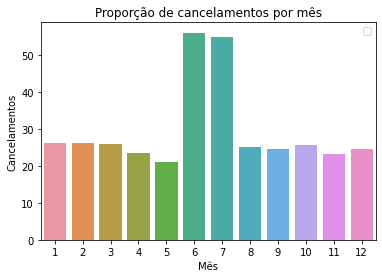

In [127]:
sns.barplot(x=list(range(1, 13)), y=proporcao_cancelamentos_mes)
plt.title('Proporção de cancelamentos por mês')
plt.xlabel('Mês')
plt.ylabel('Cancelamentos')
plt.legend()
plt.show()

In [128]:
temp = df[df['mes_6'] == 1]
temp = temp[temp['cancelamento'] == 1]
# temp
temp.describe()

,emissoes_ultimos_3_meses,emissoes_ultimo_mes,crescimento_emissoes,tickets_abertos_ultimos_3_meses,tickets_abertos_ultimo_mes,crescimento_tickets_abertos,atraso_fatura_ultimos_3_meses,atraso_fatura_ultimo_mes,cancelamento,mes_1,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.0,920.0,...,920.0,920.0,920.0,920.0,920.0,920.0,920.0,920.0,920.0,920.0
mean,5070.673913,1091.859783,0.634413,37.642391,16.977174,1.263750,1.565217,0.563043,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2816.977896,680.563428,0.164975,15.589167,7.231785,0.347548,1.093102,0.496279,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,301.000000,17.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2570.000000,519.500000,0.570000,30.000000,14.000000,1.100000,1.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5077.000000,1043.000000,0.590000,40.000000,18.000000,1.275000,2.000000,1.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7500.250000,1580.500000,0.590000,49.000000,22.000000,1.470000,3.000000,1.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9964.000000,3323.000000,1.190000,60.000000,30.000000,2.110000,3.000000,1.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


No handles with labels found to put in legend.


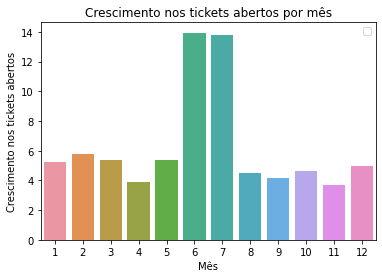

In [129]:
proporcao_crescimento_tickets_mes = []

for mes in range(1, 13):
    registros = df[df['mes_{}'.format(mes)] == 1]
    total_registros = registros.shape[0]
    total_crescimento_tickets = registros[registros['crescimento_tickets_abertos'] > 1.5].shape[0]
    proporcao_crescimento_tickets_mes.append((total_crescimento_tickets * 100) / total_registros)

sns.barplot(x=list(range(1, 13)), y=proporcao_crescimento_tickets_mes)
plt.title('Crescimento nos tickets abertos por mês')
plt.xlabel('Mês')
plt.ylabel('Crescimento nos tickets abertos')
plt.legend()
plt.show()

In [130]:
features = ['emissoes_ultimos_3_meses', 'emissoes_ultimo_mes', 'crescimento_emissoes', 'tickets_abertos_ultimos_3_meses', 'tickets_abertos_ultimo_mes', 'crescimento_tickets_abertos']

modelo = new_model(df, features, 'cancelamento')
modelo['metrics']

{'accuracy': 0.7483333333333333,
 'precision': 0.6557894736842105,
 'recall': 0.5927687916270219,
 'mcc': 0.43586069709474795}

In [131]:
joblib.dump(modelo, 'melhor_modelo.model')
modelo = joblib.load('melhor_modelo.model')

In [149]:
cliente_joao = {
    'emissoes_ultimos_3_meses': 1356,
    'emissoes_ultimo_mes': 499,
    'crescimento_emissoes': ((499 * 100) / (1356 / 3)) / 100,
    'tickets_abertos_ultimos_3_meses': 13,
    'tickets_abertos_ultimo_mes': 2,
    'crescimento_tickets_abertos': ((2 * 100) / (13 / 3)) / 100
}
cliente_joao

{'emissoes_ultimos_3_meses': 1356,
 'emissoes_ultimo_mes': 499,
 'crescimento_emissoes': 1.1039823008849559,
 'tickets_abertos_ultimos_3_meses': 13,
 'tickets_abertos_ultimo_mes': 2,
 'crescimento_tickets_abertos': 0.4615384615384616}

In [150]:
modelo['model'].predict_proba([list(cliente_joao.values())])

array([[0.73, 0.27]])

In [151]:
probabilidade_cancelamento = modelo['model'].predict_proba([list(cliente_joao.values())])[0][1]
print('Existe uma probabilidade de {}% do João cancelar o contrato'.format(probabilidade_cancelamento * 100))

Existe uma probabilidade de 27.0% do João cancelar o contrato
